# Lyft Bay Wheels – Bay Area Bikeshare

In this query project, I used SQL while learning about Google Cloud Platform (GCP) and BiqQuery. I created and answered business-driven questions using public datasets housed in GCP. To get more experience with different ways to use these datasets, I used the web UI (BiqQuery) and command-line tools in Jupyter Notebooks.


###### Problem Statement

As a data scientist at Lyft Bay Wheels (https://www.lyft.com/bikes/bay-wheels), formerly known as Ford GoBike, the company running Bay Area Bikeshare. I am trying to increase ridership, and want to offer deals through the mobile app to do so.

What deals do I offer? Currently, Lyft Bay Wheels has several options which can change over time. Frequent offers include:

Single Ride
Monthly Membership
Annual Membership
Bike Share for All
Access Pass
Corporate Membership
etc.

Through this project, I will answer these questions:

What are the 5 most popular trips that you would call "commuter trips"?

What are your recommendations for offers (justify based on your findings)?


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Main Question 1: 

##### What are the 5 most popular trips that you would call "commuter trips"?

Assuming a "commuter trip" is a rental starting in the morning (6-8 AM) and in the afternoon (5-7 PM) and lasting between 5 minutes to 45 minutes, the top 5 bike stations with the most bikes rented during a commuter trip are San Francisco Caltrain (Townsend at 4th), San Francisco Caltrain 2 (330 Townsend), Harry Bridges Plaza (Ferry Building), Temporary Transbay Terminal (Howard at Beale), and Market at 10th. 

In [100]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT start_station_name, COUNT(*) AS total FROM `bike_trip_data.Commuter_stations` GROUP BY start_station_name ORDER BY total DESC;' > commuter_stations.csv

Waiting on bqjob_r72e89c29920bde04_00000174e1e391a2_1 ... (0s) Current status: DONE   


In [101]:
commuter_stations = pd.read_csv('commuter_stations.csv')
commuter_stations

,start_station_name,total
0,San Francisco Caltrain (Townsend at 4th),36983
1,San Francisco Caltrain 2 (330 Townsend),20967
2,Harry Bridges Plaza (Ferry Building),13742
3,Temporary Transbay Terminal (Howard at Beale),11584
4,Market at 10th,10516
...,...,...
79,Mezes,5
80,5th S at E. San Salvador St,5
81,San Jose Government Center,5
82,Sequoia Hospital,2


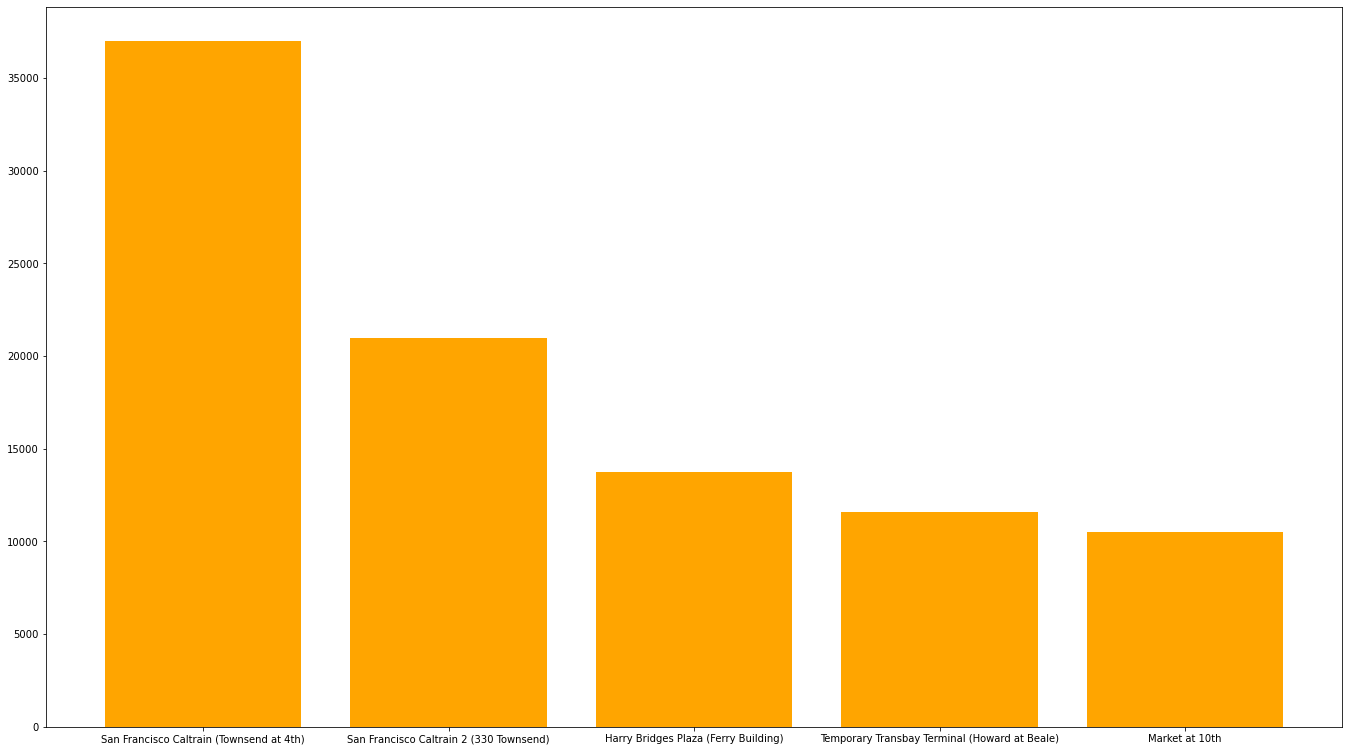

In [102]:
fig_3 = plt.figure(figsize=(18, 10))
ax = fig_3.add_axes([0,0,1,1])
landmarks = ['San Francisco Caltrain (Townsend at 4th)', 'San Francisco Caltrain 2 (330 Townsend)', 'Harry Bridges Plaza (Ferry Building)', 'Temporary Transbay Terminal (Howard at Beale)', 'Market at 10th']
dockcount = [36983,20967,13742,11584,10516]
ax.bar(landmarks,dockcount, color = 'orange')
plt.show()

In [103]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT start_station_name, end_station_name, count(*) AS number_of_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE start_station_name <> end_station_name GROUP BY start_station_name, end_station_name HAVING number_of_trips > 5900 ORDER BY 1, 2, 3' > trip_by_station.csv

Waiting on bqjob_r17fa890c32f9036_00000174e1e39a9b_1 ... (0s) Current status: DONE   


In [104]:
trip_by_station = pd.read_csv('trip_by_station.csv')
trip_by_station

,start_station_name,end_station_name,number_of_trips
0,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7620
1,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),6351
2,Embarcadero at Sansome,Steuart at Market,6874
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6888
4,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9150
5,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),6215
6,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8508
7,Steuart at Market,2nd at Townsend,6039
8,Steuart at Market,San Francisco Caltrain (Townsend at 4th),5959
9,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),6836


### Main Question 2: 

##### What are your recommendations for offers (justify based on your findings)?

Recommendation 1: Since there are almost 3x as many bike rides taken during the weekdays than there are during the weekends, I would recommend creating a 
I would also recommend making a subscription discount for stations with high rental rates during commuter times, since if customers are going to use bikes for commuting regularly, it would be in their beter interest to subscribe and Lyft would receive more subscribers. Stations with higher rental rates during commuter times include San Francisco Caltrain (Townsend at 4th), San Francisco Caltrain 2 (330 Townsend), and Harry Bridges Plaza (Ferry Building). 

Recommendation 2: The bike trip starting at Harry Bridges Plaza (Ferry Building) and ending at Embarcadero at Sansome had the highest frequency in number of trips taken. The average ride from Harry Bridges Plaza (Ferry Building), station ID 50, to Embarcadero at Sansome, station ID 60, takes 1188 seconds, or 19.8 minutes. Offering discounts on the weekends or a bike pass specifically for weekends only (leisure) for these locations may increase bike rentals during the weekends, since sales during the weekays are significantly stronger. 

Recommendation 3: Offering a student membership for rentals on the weekdays for students to commute to school and on the weekends for leisure to increase sales at low-traffic stations. There are roughly 6x more trips made by subscribers than their are trips made by customers(single ride customers), and lower-income groups like students may be unable to pay a monthly or annual subscription fee upfront, so making a student membership may increase ridership. 

Recommendation 4: Remove stations where ridership is extremely low (lowest commuter trips = Mezes, 5th S at E. San Salvador St, San Jose Government Center, Sequoia Hospital, and 5th St at E. San Salvador St. Place these docks at other stations that have high foot traffic. 


In [105]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT * FROM `bike_trip_data.Bikeshare_stations` ORDER BY dockcount DESC LIMIT 5' > dockcount.csv

Waiting on bqjob_r64a0f0755546b603_00000174e1e3a1d3_1 ... (0s) Current status: DONE   


In [106]:
dockcount = pd.read_csv('dockcount.csv')
dockcount

,station_id,name,latitude,longitude,dockcount,landmark,installation_date
0,91,Cyril Magnin St at Ellis St,37.785908,-122.408891,35,San Francisco,2016-08-04
1,90,5th St at Folsom St,37.780148,-122.403158,31,San Francisco,2016-08-04
2,67,Market at 10th,37.776619,-122.417385,27,San Francisco,2013-08-23
3,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,2013-08-25
4,61,2nd at Townsend,37.780526,-122.390288,27,San Francisco,2013-08-22


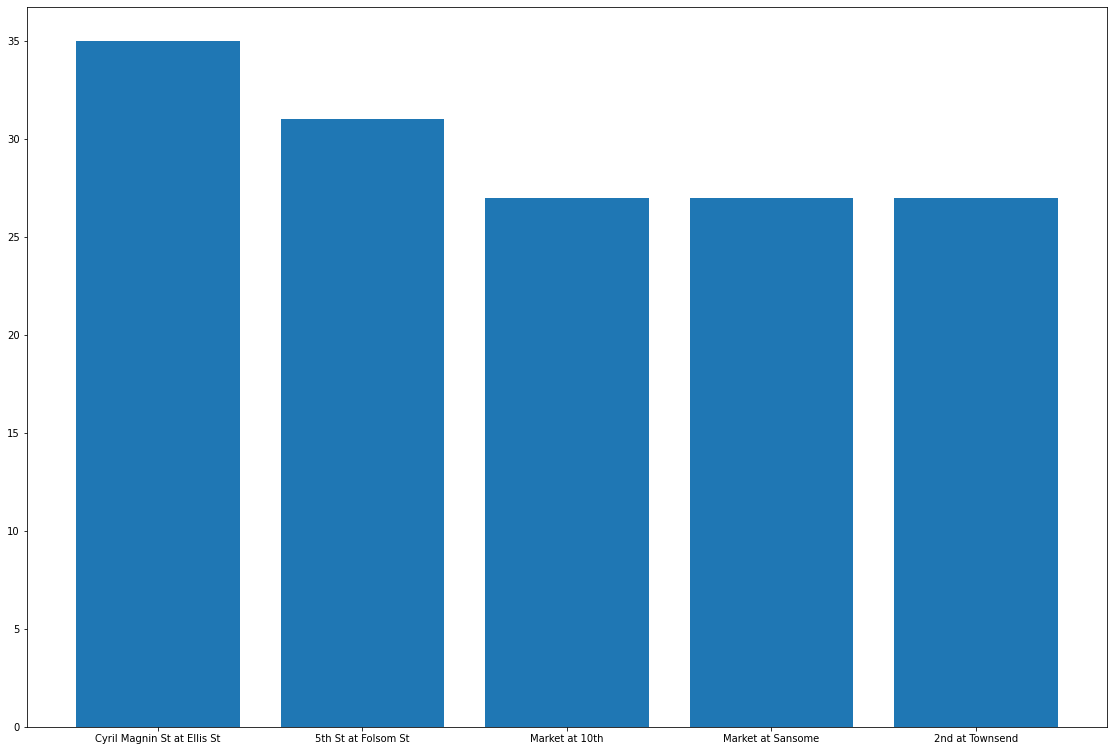

In [107]:
fig_1 = plt.figure(figsize=(15, 10))
ax = fig_1.add_axes([0,0,1,1])
stations = ['Cyril Magnin St at Ellis St', '5th St at Folsom St', 'Market at 10th', 'Market at Sansome', '2nd at Townsend']
dockcount = [35,31,27,27,27]
ax.bar(stations,dockcount)
plt.show()

In [108]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT * FROM `splendid-map-287823.bike_trip_data.Weekday_weekend`' > weekday_weekend.csv

Waiting on bqjob_r7c9d1ca1e38628e9_00000174e1e3a99a_1 ... (0s) Current status: DONE   


In [109]:
weekday_weekend = pd.read_csv('weekday_weekend.csv')
weekday_weekend

,dow_weekday,total_weekday_weekend
0,Weekday,871994
1,Weekend,111654


In [110]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT landmark, COUNT(dockcount) AS total FROM `splendid-map-287823.bike_trip_data.Bikeshare_stations` GROUP BY landmark' > landmark_dc.csv

Waiting on bqjob_r5903bfd141b60a17_00000174e1e3b168_1 ... (0s) Current status: DONE   


In [111]:
landmark_dc = pd.read_csv('landmark_dc.csv')
landmark_dc

,landmark,total
0,San Jose,18
1,Palo Alto,5
2,Redwood City,7
3,Mountain View,7
4,San Francisco,37


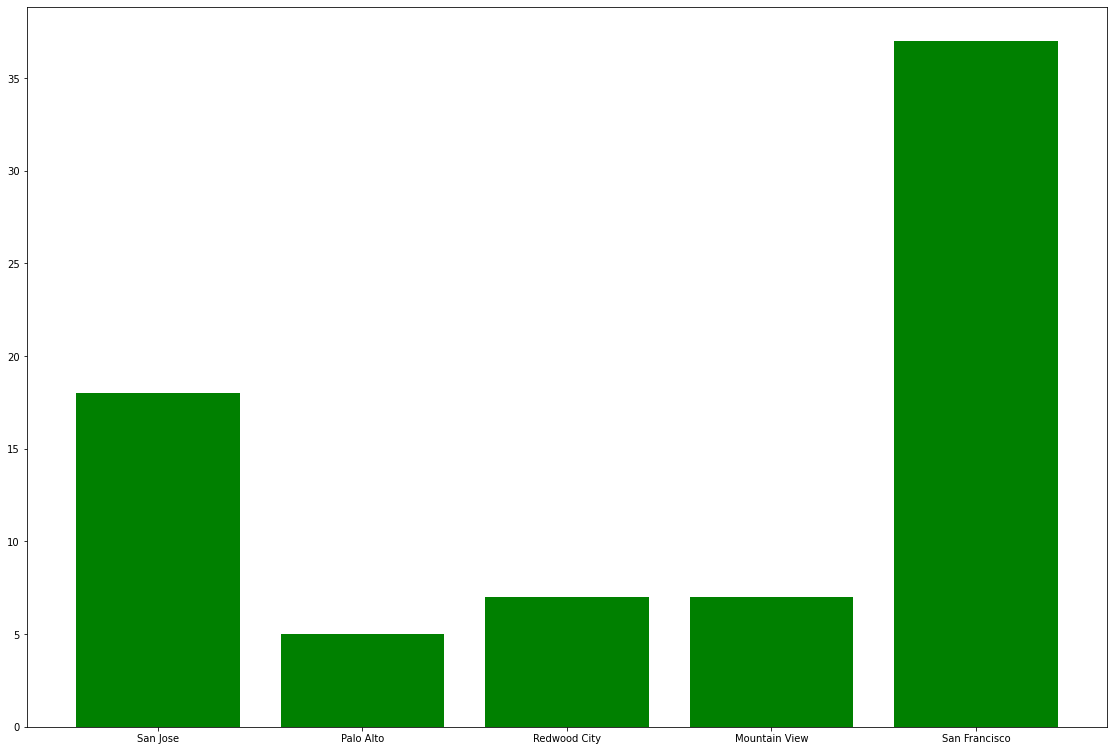

In [112]:
fig_2 = plt.figure(figsize=(15, 10))
ax = fig_2.add_axes([0,0,1,1])
landmarks = ['San Jose', 'Palo Alto', 'Redwood City', 'Mountain View', 'San Francisco']
dockcount = [18,5,7,7,37]
ax.bar(landmarks,dockcount, color = 'green')
plt.show()

### Appendix

##### SQL Queries 

SELECT duration_sec, start_date, 
       EXTRACT(DAYOFWEEK FROM start_date) AS dow_int,
       CASE EXTRACT(DAYOFWEEK FROM start_date)
           WHEN 1 THEN "Sunday"
           WHEN 2 THEN "Monday"
           WHEN 3 THEN "Tuesday"
           WHEN 4 THEN "Wednesday"
           WHEN 5 THEN "Thursday"
           WHEN 6 THEN "Friday"
           WHEN 7 THEN "Saturday"
           END AS dow_str,
       CASE 
           WHEN EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) THEN "Weekend"
           ELSE "Weekday"
           END AS dow_weekday,
       EXTRACT(HOUR FROM start_date) AS start_hour,
       CASE 
           WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime"
           WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day"
           WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening"
           END AS start_hour_str
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE duration_sec <= 2700 AND duration_sec >= 300
ORDER BY duration_sec ASC

SELECT * FROM `splendid-map-287823.bike_trip_data.Bikeshare_stations`

SELECT start_station_name, start_hour_str
FROM `bike_trip_data.Station_time_of_day_commuter`
WHERE start_hour_str = 'Morning' OR start_hour_str = 'Afternoon'

SELECT start_station_name, COUNT(*) AS total
FROM `bike_trip_data.Commuter_stations`
GROUP BY start_station_name
ORDER BY total DESC;

SELECT start_hour_str, COUNT(*) AS total
FROM `bike_trip_data.5_45_Min_Duration_Weekday`
WHERE start_hour_str = 'Morning' OR start_hour_str = 'Afternoon'
GROUP BY start_hour_str

SELECT start_station_name, duration_sec, start_date,
       EXTRACT(DAYOFWEEK FROM start_date) AS dow_int,
       CASE EXTRACT(DAYOFWEEK FROM start_date)
           WHEN 1 THEN "Sunday"
           WHEN 2 THEN "Monday"
           WHEN 3 THEN "Tuesday"
           WHEN 4 THEN "Wednesday"
           WHEN 5 THEN "Thursday"
           WHEN 6 THEN "Friday"
           WHEN 7 THEN "Saturday"
           END AS dow_str,
       CASE 
           WHEN EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) THEN "Weekend"
           ELSE "Weekday"
           END AS dow_weekday,
       EXTRACT(HOUR FROM start_date) AS start_hour,
       CASE 
           WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime"
           WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day"
           WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening"
           END AS start_hour_str
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
ORDER BY start_date ASC

SELECT duration_sec, start_date
FROM `bigquery-public-data.san_francisco.bikeshare_trips`

SELECT * FROM `splendid-map-287823.bike_trip_data.Bikeshare_stations`
ORDER BY dockcount DESC;

SELECT landmark, COUNT(dockcount) AS total FROM `splendid-map-287823.bike_trip_data.Bikeshare_stations` GROUP BY landmark

SELECT start_hour_str, COUNT(*) AS total_trips
FROM `bike_trip_data.Weekday_time_of_day`
WHERE start_hour_str = 'Morning' OR start_hour_str = 'Afternoon'
GROUP BY start_hour_str

SELECT trip_id
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE subscriber_type = 'Subscriber' 

SELECT start_station_name, start_hour_str
FROM `bike_trip_data.Date_time_duration_station_name`
WHERE duration_sec >= 500 AND duration_sec <= 2700

SELECT COUNT(subscriber_type), start_station_name
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE subscriber_type = 'Subscriber'
GROUP BY start_station_name

SELECT station_id, docks_available, bikes_available, time, 
(docks_available + bikes_available) as total_bikes
FROM `bigquery-public-data.san_francisco.bikeshare_status`

SELECT start_station_name, end_station_name, count(*) AS number_of_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE start_station_name <> end_station_name GROUP BY start_station_name, end_station_name HAVING number_of_trips > 5900 ORDER BY 1, 2, 3

SELECT duration_sec, 
       CAST(ROUND(duration_sec / 60.0) AS INT64) AS duration_minutes,
       CAST(ROUND(duration_sec / 3600.0) AS INT64) AS duration_hours_rounded,
       ROUND(duration_sec / 3600.0, 1) AS duration_hours_tenths
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
ORDER BY duration_sec ASC

SELECT start_date,
       EXTRACT(DAYOFWEEK FROM start_date) AS dow_int,
       CASE EXTRACT(DAYOFWEEK FROM start_date)
           WHEN 1 THEN "Sunday"
           WHEN 2 THEN "Monday"
           WHEN 3 THEN "Tuesday"
           WHEN 4 THEN "Wednesday"
           WHEN 5 THEN "Thursday"
           WHEN 6 THEN "Friday"
           WHEN 7 THEN "Saturday"
           END AS dow_str,
       CASE 
           WHEN EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) THEN "Weekend"
           ELSE "Weekday"
           END AS dow_weekday,
       EXTRACT(HOUR FROM start_date) AS start_hour,
       CASE 
           WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime"
           WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day"
           WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening"
           END AS start_hour_str
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
ORDER BY start_date ASC

SELECT dow_weekday, COUNT(*) AS total_weekday_weekend
FROM `bike_trip_data.Weekday_time_of_day` 
WHERE dow_weekday = 'Weekend' OR dow_weekday = 'Weekday'
GROUP BY dow_weekday

SELECT AVG(duration_sec) FROM `splendid-map-287823.bike_trip_data.Bikeshare_trips` WHERE start_station_id = 50 AND end_station_id = 60

SELECT DISTINCT trip_id
FROM bigquery-public-data.san_francisco.bikeshare_trips

SELECT start_date, end_date 
FROM bigquery-public-data.san_francisco.bikeshare_trips
ORDER BY start_date, end_date ASC;

SELECT DISTINCT bike_number
FROM bigquery-public-data.san_francisco.bikeshare_trips

SELECT duration_sec
FROM bigquery-public-data.san_francisco.bikeshare_trips
ORDER BY duration_sec DESC;

SELECT DISTINCT start_station_name
FROM bigquery-public-data.san_francisco.bikeshare_trips

SELECT *
FROM bigquery-public-data.san_francisco.bikeshare_trips
WHERE subscriber_type = 'Customer'

SELECT DISTINCT region_id, station_id
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_station_info`